In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **1. Obtaining the dataset from ChEMBL**


## **1.1. Install ChEMBL web service package**

In [1]:
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.1 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.30.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [2]:
import chembl_webresource_client
print(chembl_webresource_client.__version__)

development


## **1.2. Import packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chembl_webresource_client.new_client import new_client

## **1.3. Target proteins**

In [6]:
# selected targets from ChEMBL webpage
targets = pd.read_csv('Denv_targets.csv', sep=',')
targets

,target_chembl_id,Name,UniProt Accessions,Type,Organism,Compounds,Activities,Tax ID,Species Group Flag
0,CHEMBL5980,Dengue virus type 2 NS3 protein,P29990,SINGLE PROTEIN,Dengue virus type 2 (strain Thailand/16681/198...,1569,2214,31634,False
1,CHEMBL5419,Genome polyprotein,P06935,SINGLE PROTEIN,West Nile virus,431,601,11082,False
2,CHEMBL4523307,Genome polyprotein,Q32ZE1,SINGLE PROTEIN,Zika virus,22,22,64320,False
3,CHEMBL3308998,Genome polyprotein,P12823,SINGLE PROTEIN,Dengue virus type 2,35,78,11066,False


In [58]:
# Create a dataframe to store the results
results_df = pd.DataFrame()

# Loop over each target ID in the "target_chembl_id" column
for target in targets['target_chembl_id']:
    # Filter the "activity" dataframe using the current target value
    activity = new_client.activity
    res = activity.filter(target_chembl_id=target).filter(standard_type__in=['EC50', 'IC50', 'pIC50'])
    # Convert the results to a dataframe and append them to the results dataframe
    temp_df = pd.DataFrame.from_dict(res)
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

In [59]:
results_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
1,None,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,None,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
3,None,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,None,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,None,None,3100233,[],CHEMBL1067223,Inhibition of Dengue virus type 2 NS5 RNA meth...,B,None,None,BAO_0000190,...,Dengue virus type 2,Genome polyprotein,11066,None,None,IC50,uM,UO_0000065,None,10.52
1801,None,None,3100234,[],CHEMBL1067222,Inhibition of Dengue virus type 2 NS5 RNA meth...,B,None,None,BAO_0000190,...,Dengue virus type 2,Genome polyprotein,11066,None,None,IC50,uM,UO_0000065,None,3.16
1802,None,None,3100235,[],CHEMBL1067221,Inhibition of Dengue virus type 2 NS5 RNA meth...,B,None,None,BAO_0000190,...,Dengue virus type 2,Genome polyprotein,11066,None,None,IC50,uM,UO_0000065,None,7.14
1803,None,None,3100236,[],CHEMBL1067222,Inhibition of Dengue virus type 2 NS5 RNA meth...,B,None,None,BAO_0000190,...,Dengue virus type 2,Genome polyprotein,11066,None,None,IC50,uM,UO_0000065,None,7.62


In [28]:
results_df.dropna(subset='canonical_smiles')
results_df.reset_index(inplace=True, drop=True)

results_df.dropna(subset='type')
results_df.reset_index(inplace=True, drop=True)

results_df.dropna(subset='value')
results_df.reset_index(inplace=True, drop=True)

results_df['value'] = pd.to_numeric(results_df['value'], errors='coerce')

In [29]:
results_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,active,7018430,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.00
1,None,active,7018431,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,12.31
2,None,active,7018432,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.00
3,None,active,7018433,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,50.97
4,None,active,7018434,[],CHEMBL1794550,PUBCHEM_BIOASSAY: Primary and Confirmatory Scr...,F,None,None,BAO_0000190,...,Dengue virus type 2 (strain Thailand/16681/198...,Dengue virus type 2 NS3 protein,31634,None,None,IC50,uM,UO_0000065,None,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,None,None,3100233,[],CHEMBL1067223,Inhibition of Dengue virus type 2 NS5 RNA meth...,B,None,None,BAO_0000190,...,Dengue virus type 2,Genome polyprotein,11066,None,None,IC50,uM,UO_0000065,None,10.52
1801,None,None,3100234,[],CHEMBL1067222,Inhibition of Dengue virus type 2 NS5 RNA meth...,B,None,None,BAO_0000190,...,Dengue virus type 2,Genome polyprotein,11066,None,None,IC50,uM,UO_0000065,None,3.16
1802,None,None,3100235,[],CHEMBL1067221,Inhibition of Dengue virus type 2 NS5 RNA meth...,B,None,None,BAO_0000190,...,Dengue virus type 2,Genome polyprotein,11066,None,None,IC50,uM,UO_0000065,None,7.14
1803,None,None,3100236,[],CHEMBL1067222,Inhibition of Dengue virus type 2 NS5 RNA meth...,B,None,None,BAO_0000190,...,Dengue virus type 2,Genome polyprotein,11066,None,None,IC50,uM,UO_0000065,None,7.62


**Save raw dataset**

In [30]:
results_df.to_csv('raw_dataset.csv', index=False)

# **2. The IC50 subset**

In [32]:
results_df.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [64]:
df = results_df[['molecule_chembl_id', 'canonical_smiles', 'type', 'units', 'value']]
df_IC50 = df[df['type']=='IC50']
df_IC50

,molecule_chembl_id,canonical_smiles,type,units,value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,IC50,uM,100.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,IC50,uM,12.31
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,IC50,uM,100.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,IC50,uM,50.97
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,IC50,uM,100.0
...,...,...,...,...,...
1800,CHEMBL597978,COc1ccc(/C=C2/CN(CCCC(=O)O)C(=O)C2=O)cc1,IC50,uM,10.52
1801,CHEMBL115145,O=C(O)c1cc(Cc2ccc(O)c(C(=O)O)c2)ccc1O,IC50,uM,3.16
1802,CHEMBL115145,O=C(O)c1cc(Cc2ccc(O)c(C(=O)O)c2)ccc1O,IC50,uM,7.14
1803,CHEMBL597979,O=S(=O)(O)c1cccc(NNc2ccc(Nc3ccccc3)cc2)c1,IC50,uM,7.62


In [65]:
df_IC50['units'].value_counts()

uM         1476
nM           29
umol/L        3
ug ml-1       1
Name: units, dtype: int64

### **2.1. Transform nM to uM**

In [66]:
nano = df_IC50[df_IC50['units']=='nM']
# nano.dropna(subset='canonical_smiles')
# nano.reset_index(inplace=True, drop=True)
nano

,molecule_chembl_id,canonical_smiles,type,units,value
1372,CHEMBL5083861,COc1ccc(S(=O)(=O)n2nc(OC(=O)c3ccc(-c4ccccc4)cc...,IC50,nM,500.0
1373,CHEMBL5083861,COc1ccc(S(=O)(=O)n2nc(OC(=O)c3ccc(-c4ccccc4)cc...,IC50,nM,500.0
1374,CHEMBL5075008,Nc1ccc(C(=O)Oc2cc(N)n(S(=O)(=O)c3ccc(Oc4ccccc4...,IC50,nM,9.0
1375,CHEMBL5092085,Nc1cc(OC(=O)c2ccc(-c3ccccc3)cc2)nn1S(=O)(=O)c1...,IC50,nM,12.0
1376,CHEMBL5075993,CCOc1ccc(S(=O)(=O)n2nc(OC(=O)c3ccc(-c4ccccc4)c...,IC50,nM,6.0
1377,CHEMBL5081752,Nc1ccc(C(=O)Oc2cc(N)n(S(=O)(=O)c3ccc(Br)cc3)n2...,IC50,nM,74.0
1378,CHEMBL5094815,N=C(N)N[C@H]1CC[C@H](CNC(=O)[C@H](CCCCN)NC(=O)...,IC50,nM,17070.0
1472,CHEMBL521985,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...,IC50,nM,231.0
1473,CHEMBL468885,NCCCC[C@H](NC(=O)Cc1ccccc1)C(=O)N[C@@H](CCCCN)...,IC50,nM,25684.0
1474,CHEMBL468674,N=C(N)NCCCC[C@H](NC(=O)[C@H](CCCCN)NC(=O)Cc1cc...,IC50,nM,297.0


In [ ]:
# convert nano to micro

nano_transformed = nano['value']/1000

In [67]:
# replace the old column of values (in nM) by a new column (uM)
nano.drop(columns=['value'], axis=1, inplace=True)
nano['value'] = nano_transformed
nano.reset_index(inplace=True, drop=True)
nano['units'] = nano['units'].replace('nM', 'uM')
nano

<ipython-input-67-e5e663941942>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nano.drop(columns=['value'], axis=1, inplace=True)
<ipython-input-67-e5e663941942>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nano['value'] = nano_transformed
<ipython-input-67-e5e663941942>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,molecule_chembl_id,canonical_smiles,type,units,value
0,CHEMBL5083861,COc1ccc(S(=O)(=O)n2nc(OC(=O)c3ccc(-c4ccccc4)cc...,IC50,uM,0.500
1,CHEMBL5083861,COc1ccc(S(=O)(=O)n2nc(OC(=O)c3ccc(-c4ccccc4)cc...,IC50,uM,0.500
2,CHEMBL5075008,Nc1ccc(C(=O)Oc2cc(N)n(S(=O)(=O)c3ccc(Oc4ccccc4...,IC50,uM,0.009
3,CHEMBL5092085,Nc1cc(OC(=O)c2ccc(-c3ccccc3)cc2)nn1S(=O)(=O)c1...,IC50,uM,0.012
4,CHEMBL5075993,CCOc1ccc(S(=O)(=O)n2nc(OC(=O)c3ccc(-c4ccccc4)c...,IC50,uM,0.006
5,CHEMBL5081752,Nc1ccc(C(=O)Oc2cc(N)n(S(=O)(=O)c3ccc(Br)cc3)n2...,IC50,uM,0.074
6,CHEMBL5094815,N=C(N)N[C@H]1CC[C@H](CNC(=O)[C@H](CCCCN)NC(=O)...,IC50,uM,17.070
7,CHEMBL521985,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...,IC50,uM,0.231
8,CHEMBL468885,NCCCC[C@H](NC(=O)Cc1ccccc1)C(=O)N[C@@H](CCCCN)...,IC50,uM,25.684
9,CHEMBL468674,N=C(N)NCCCC[C@H](NC(=O)[C@H](CCCCN)NC(=O)Cc1cc...,IC50,uM,0.297


### **2.2. Get those with uM**

In [68]:
micro_raw = df_IC50[df_IC50['units']=='uM']
micro_raw.reset_index(inplace=True, drop=True)
micro_raw

,molecule_chembl_id,canonical_smiles,type,units,value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,IC50,uM,100.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,IC50,uM,12.31
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,IC50,uM,100.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,IC50,uM,50.97
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,IC50,uM,100.0
...,...,...,...,...,...
1471,CHEMBL597978,COc1ccc(/C=C2/CN(CCCC(=O)O)C(=O)C2=O)cc1,IC50,uM,10.52
1472,CHEMBL115145,O=C(O)c1cc(Cc2ccc(O)c(C(=O)O)c2)ccc1O,IC50,uM,3.16
1473,CHEMBL115145,O=C(O)c1cc(Cc2ccc(O)c(C(=O)O)c2)ccc1O,IC50,uM,7.14
1474,CHEMBL597979,O=S(=O)(O)c1cccc(NNc2ccc(Nc3ccccc3)cc2)c1,IC50,uM,7.62


## **2.3. Combine all uM subset**

In [69]:
all_micro = pd.concat([micro_raw, nano]).reset_index(drop=True)
all_micro

,molecule_chembl_id,canonical_smiles,type,units,value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,IC50,uM,100.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,IC50,uM,12.31
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,IC50,uM,100.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,IC50,uM,50.97
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,IC50,uM,100.0
...,...,...,...,...,...
1500,CHEMBL503904,COc1ccc2ccc([C@H](C)C(=O)N[C@@H](CCCCN)C(=O)N[...,IC50,uM,0.112
1501,CHEMBL506092,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...,IC50,uM,0.032
1502,CHEMBL522355,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...,IC50,uM,0.051
1503,CHEMBL494699,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...,IC50,uM,0.58


# **3. The EC50 dataset**

In [72]:
df_EC50 = df[df['type']=='EC50']
df_EC50['value'] = pd.to_numeric(df_EC50['value'], errors='coerce')
df_EC50

,molecule_chembl_id,canonical_smiles,type,units,value
1056,CHEMBL1980535,CC(=O)O[C@H]1CC(C)(C)C(=C=C/C(C)=C/C=C/C=C/C=C...,EC50,uM,4.5
1057,CHEMBL1980535,CC(=O)O[C@H]1CC(C)(C)C(=C=C/C(C)=C/C=C/C=C/C=C...,EC50,uM,5.84
1058,CHEMBL1980535,CC(=O)O[C@H]1CC(C)(C)C(=C=C/C(C)=C/C=C/C=C/C=C...,EC50,uM,7.62
1077,CHEMBL1980535,CC(=O)O[C@H]1CC(C)(C)C(=C=C/C(C)=C/C=C/C=C/C=C...,EC50,uM,8.5
1144,CHEMBL3741422,N=C(N)NCCC[C@H](NC(=O)c1ccccc1)C(=O)N[C@@H](CC...,EC50,uM,16.0
...,...,...,...,...,...
1465,CHEMBL5201148,COc1cccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)c1,EC50,uM,1.1
1466,CHEMBL5195025,N#Cc1ccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)cc1,EC50,uM,2.9
1467,CHEMBL5169561,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2ccc(Cl)cc2)c1,EC50,uM,4.1
1468,CHEMBL5185746,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2c(Cl)cccc2C...,EC50,uM,2.4


In [79]:
df_EC50['units'].value_counts()

uM    112
Name: units, dtype: int64

## **Combine IC50 and EC50 data**

In [80]:
df3 = pd.concat([df_IC50, df_EC50])
df3.reset_index(inplace=True, drop=True)
df3

,molecule_chembl_id,canonical_smiles,type,units,value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,IC50,uM,100.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,IC50,uM,12.31
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,IC50,uM,100.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,IC50,uM,50.97
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,IC50,uM,100.0
...,...,...,...,...,...
1800,CHEMBL5201148,COc1cccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)c1,EC50,uM,1.1
1801,CHEMBL5195025,N#Cc1ccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)cc1,EC50,uM,2.9
1802,CHEMBL5169561,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2ccc(Cl)cc2)c1,EC50,uM,4.1
1803,CHEMBL5185746,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2c(Cl)cccc2C...,EC50,uM,2.4


# **Add 'Active/Inactive or intermediate' label to each molecule**

In [85]:
df3['value'] = pd.to_numeric(df3['value'])

status = []
for i in df3['value']:
  if i < 20:
    status.append('active')
  elif i > 30:
    status.append('inactive')
  else:
    status.append('intermediate')

In [86]:
df3['status'] = status

In [87]:
df3['status'].value_counts()

inactive        896
active          563
intermediate    346
Name: status, dtype: int64

In [90]:
df3.dropna(subset=['value'], inplace=True)
df3.reset_index(inplace=True, drop=True)
df3.dropna(subset=['canonical_smiles'], inplace=True)
df3.isna().sum()

molecule_chembl_id    0
canonical_smiles      0
type                  0
units                 0
value                 0
status                0
dtype: int64

In [91]:
df3

,molecule_chembl_id,canonical_smiles,type,units,value,status
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,IC50,uM,100.00,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,IC50,uM,12.31,active
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,IC50,uM,100.00,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,IC50,uM,50.97,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,IC50,uM,100.00,inactive
...,...,...,...,...,...,...
1616,CHEMBL5201148,COc1cccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)c1,EC50,uM,1.10,active
1617,CHEMBL5195025,N#Cc1ccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)cc1,EC50,uM,2.90,active
1618,CHEMBL5169561,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2ccc(Cl)cc2)c1,EC50,uM,4.10,active
1619,CHEMBL5185746,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2c(Cl)cccc2C...,EC50,uM,2.40,active


In [93]:
df3.to_csv('final_3_statuses.csv', index=False)

In [92]:
df3['status'].value_counts()

inactive        896
active          563
intermediate    162
Name: status, dtype: int64

# **Install RDKit**

In [94]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 24.9 MB/s eta 0:00:00


In [118]:
import rdkit
rdkit.__version__

'2023.03.3'

In [96]:
# clean the smiles column
from rdkit import Chem

def get_largest_fragment(smiles):
    mol = Chem.MolFromSmiles(smiles)
    frags = Chem.GetMolFrags(mol, asMols=True)
    largest_frag = max(frags, key=lambda x: x.GetNumAtoms())
    return Chem.MolToSmiles(largest_frag)

In [97]:
df3['canonical_smiles'] = df3['canonical_smiles'].apply(get_largest_fragment)
df3

,molecule_chembl_id,canonical_smiles,type,units,value,status
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,IC50,uM,100.00,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,IC50,uM,12.31,active
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,IC50,uM,100.00,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,IC50,uM,50.97,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,IC50,uM,100.00,inactive
...,...,...,...,...,...,...
1616,CHEMBL5201148,COc1cccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)c1,EC50,uM,1.10,active
1617,CHEMBL5195025,N#Cc1ccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)cc1,EC50,uM,2.90,active
1618,CHEMBL5169561,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2ccc(Cl)cc2)c1,EC50,uM,4.10,active
1619,CHEMBL5185746,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2c(Cl)cccc2C...,EC50,uM,2.40,active


# **Calculate molecular descriptors**

In [98]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

#Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
def descriptors(canonical_smiles, verbose=False):
    moldata = [Chem.MolFromSmiles(elem) for elem in canonical_smiles]

    baseData = np.arange(1, 1)
    for i, mol in enumerate(moldata):
        MolWt = Descriptors.MolWt(mol)
        LogP = Descriptors.MolLogP(mol)
        NHD = Lipinski.NumHDonors(mol)
        NHA = Lipinski.NumHAcceptors(mol)
        TPSA = Descriptors.TPSA(mol)
        RotBonds = Lipinski.NumRotatableBonds(mol)
        HetAtoms = Lipinski.HeavyAtomCount(mol)
        AromRings = Lipinski.NumAromaticRings(mol)
        AliphRings = Lipinski.NumAliphaticRings(mol)

        row = np.array([MolWt, LogP, NHD, NHA, TPSA, RotBonds,
                        HetAtoms, AromRings, AliphRings])

        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])

    columnNames = ["MolWt", "LogP", "NHD", "NHA",
                   "TPSA", "RotBonds", "HetAtoms",
                   "AromRings", "AliphRings"]
    molec_descriptors = pd.DataFrame(data=baseData,
                                     columns=columnNames)

    return molec_descriptors

In [100]:
df_descriptors = descriptors(df3['canonical_smiles'])
df_descriptors

,MolWt,LogP,NHD,NHA,TPSA,RotBonds,HetAtoms,AromRings,AliphRings
0,240.262,2.80020,0.0,4.0,44.24,2.0,18.0,3.0,0.0
1,268.224,2.44040,1.0,4.0,84.58,2.0,20.0,2.0,1.0
2,407.426,1.38560,1.0,5.0,88.18,5.0,30.0,2.0,2.0
3,306.277,3.84800,1.0,5.0,89.36,3.0,23.0,4.0,0.0
4,372.772,2.36698,0.0,8.0,119.64,4.0,26.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...
1616,389.216,2.74420,2.0,5.0,77.02,6.0,29.0,3.0,1.0
1617,384.200,2.60728,2.0,5.0,91.58,5.0,29.0,3.0,1.0
1618,393.635,3.38900,2.0,4.0,67.79,5.0,28.0,3.0,1.0
1619,428.080,4.04240,2.0,4.0,67.79,5.0,29.0,3.0,1.0


In [101]:
df_mol_descript = pd.concat([df3, df_descriptors], axis=1)
df_mol_descript

,molecule_chembl_id,canonical_smiles,type,units,value,status,MolWt,LogP,NHD,NHA,TPSA,RotBonds,HetAtoms,AromRings,AliphRings
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,IC50,uM,100.00,inactive,240.262,2.80020,0.0,4.0,44.24,2.0,18.0,3.0,0.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,IC50,uM,12.31,active,268.224,2.44040,1.0,4.0,84.58,2.0,20.0,2.0,1.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,IC50,uM,100.00,inactive,407.426,1.38560,1.0,5.0,88.18,5.0,30.0,2.0,2.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,IC50,uM,50.97,inactive,306.277,3.84800,1.0,5.0,89.36,3.0,23.0,4.0,0.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,IC50,uM,100.00,inactive,372.772,2.36698,0.0,8.0,119.64,4.0,26.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,CHEMBL5201148,COc1cccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)c1,EC50,uM,1.10,active,389.216,2.74420,2.0,5.0,77.02,6.0,29.0,3.0,1.0
1617,CHEMBL5195025,N#Cc1ccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)cc1,EC50,uM,2.90,active,384.200,2.60728,2.0,5.0,91.58,5.0,29.0,3.0,1.0
1618,CHEMBL5169561,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2ccc(Cl)cc2)c1,EC50,uM,4.10,active,393.635,3.38900,2.0,4.0,67.79,5.0,28.0,3.0,1.0
1619,CHEMBL5185746,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2c(Cl)cccc2C...,EC50,uM,2.40,active,428.080,4.04240,2.0,4.0,67.79,5.0,29.0,3.0,1.0


In [102]:
df_mol_descript['MolWt'].describe()

count    1621.000000
mean      436.204749
std       166.435928
min       155.109000
25%       344.294000
50%       419.436000
75%       490.484000
max      1863.303000
Name: MolWt, dtype: float64

In [103]:
# Molecular weight upper limit was chosen according to the majority of protease inhibitors
drug_like = df_mol_descript[df_mol_descript['MolWt']<= 800]
drug_like.reset_index(drop=True, inplace=True)
drug_like

,molecule_chembl_id,canonical_smiles,type,units,value,status,MolWt,LogP,NHD,NHA,TPSA,RotBonds,HetAtoms,AromRings,AliphRings
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,IC50,uM,100.00,inactive,240.262,2.80020,0.0,4.0,44.24,2.0,18.0,3.0,0.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,IC50,uM,12.31,active,268.224,2.44040,1.0,4.0,84.58,2.0,20.0,2.0,1.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,IC50,uM,100.00,inactive,407.426,1.38560,1.0,5.0,88.18,5.0,30.0,2.0,2.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,IC50,uM,50.97,inactive,306.277,3.84800,1.0,5.0,89.36,3.0,23.0,4.0,0.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,IC50,uM,100.00,inactive,372.772,2.36698,0.0,8.0,119.64,4.0,26.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,CHEMBL5201148,COc1cccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)c1,EC50,uM,1.10,active,389.216,2.74420,2.0,5.0,77.02,6.0,29.0,3.0,1.0
1588,CHEMBL5195025,N#Cc1ccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)cc1,EC50,uM,2.90,active,384.200,2.60728,2.0,5.0,91.58,5.0,29.0,3.0,1.0
1589,CHEMBL5169561,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2ccc(Cl)cc2)c1,EC50,uM,4.10,active,393.635,3.38900,2.0,4.0,67.79,5.0,28.0,3.0,1.0
1590,CHEMBL5185746,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2c(Cl)cccc2C...,EC50,uM,2.40,active,428.080,4.04240,2.0,4.0,67.79,5.0,29.0,3.0,1.0


In [104]:
drug_like.to_csv('molecules_descriptors_statuses.csv', index=False)

In [105]:
drug_like['status'].value_counts()

inactive        895
active          544
intermediate    153
Name: status, dtype: int64

# **Plots of physcico-chemical properties**

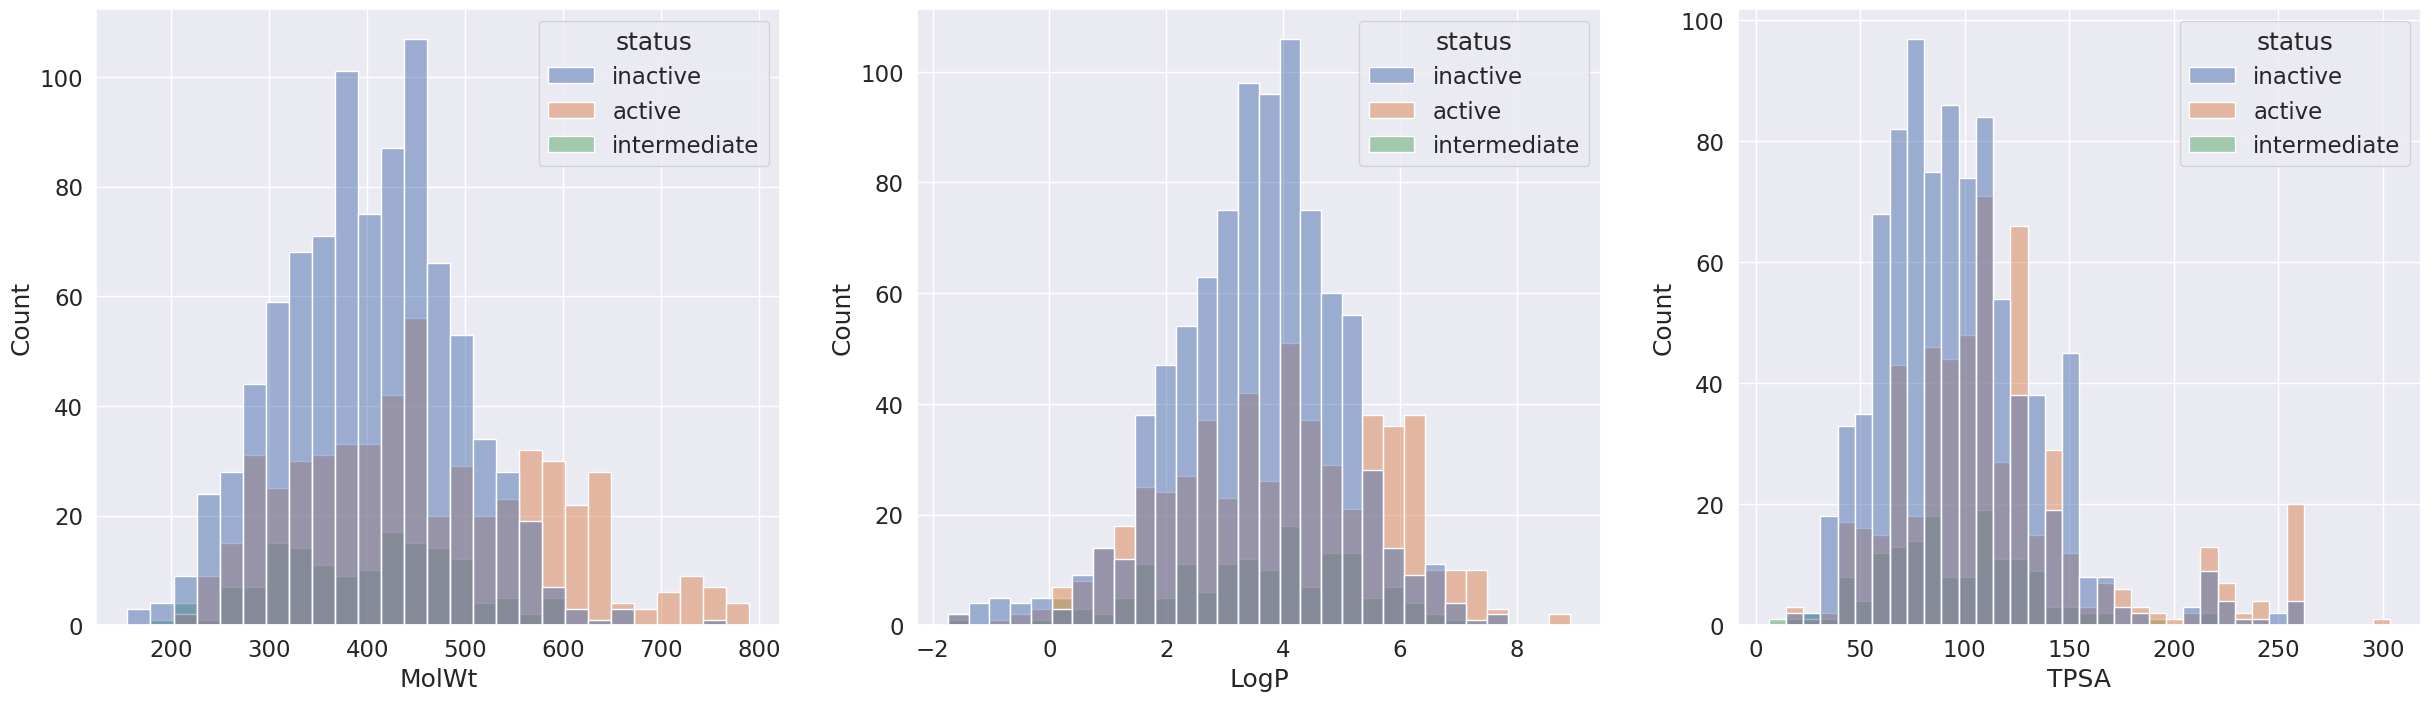

In [106]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,8))
sns.histplot(data=drug_like, x="MolWt", hue="status", ax=axes[0])
sns.histplot(data=drug_like, x="LogP", hue="status", ax=axes[1])
sns.histplot(data=drug_like, x="TPSA", hue="status", ax=axes[2])
plt.savefig('1.pdf')

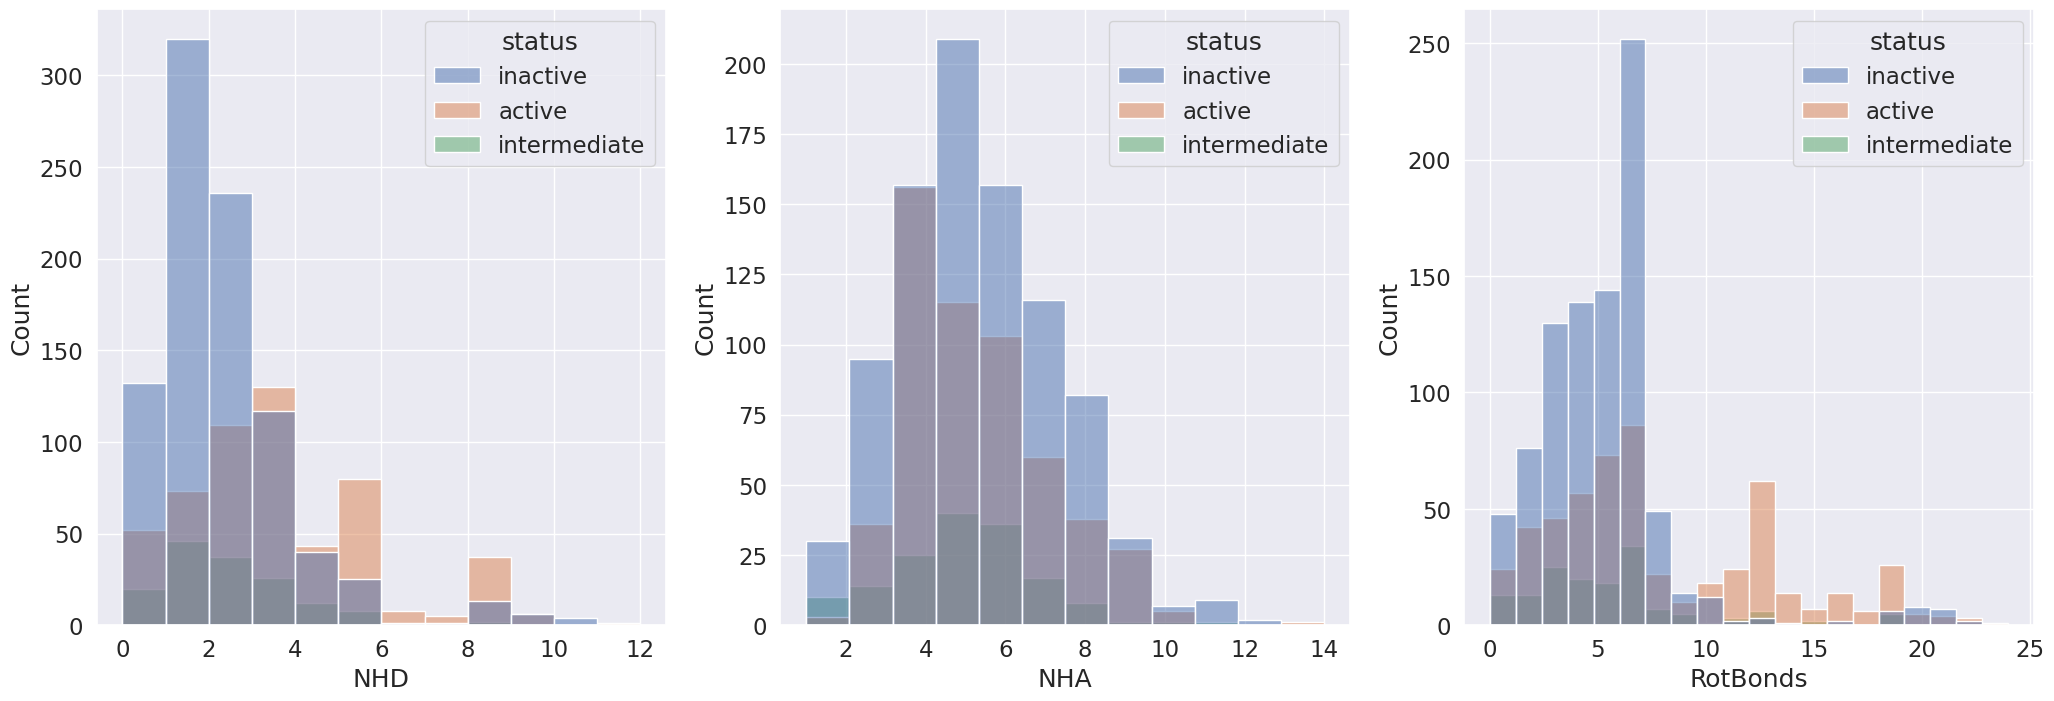

In [107]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
sns.histplot(data=drug_like, x="NHD", hue="status", bins=12, ax=axes[0])
sns.histplot(data=drug_like, x="NHA", hue="status", bins=12, ax=axes[1])
sns.histplot(data=drug_like, x="RotBonds", hue="status", bins=20, ax=axes[2])
plt.savefig('2.pdf')

In [108]:
df4 = drug_like[drug_like['status']!='intermediate']
df4.reset_index(drop=True, inplace=True)
df4

,molecule_chembl_id,canonical_smiles,type,units,value,status,MolWt,LogP,NHD,NHA,TPSA,RotBonds,HetAtoms,AromRings,AliphRings
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,IC50,uM,100.00,inactive,240.262,2.80020,0.0,4.0,44.24,2.0,18.0,3.0,0.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,IC50,uM,12.31,active,268.224,2.44040,1.0,4.0,84.58,2.0,20.0,2.0,1.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,IC50,uM,100.00,inactive,407.426,1.38560,1.0,5.0,88.18,5.0,30.0,2.0,2.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,IC50,uM,50.97,inactive,306.277,3.84800,1.0,5.0,89.36,3.0,23.0,4.0,0.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,IC50,uM,100.00,inactive,372.772,2.36698,0.0,8.0,119.64,4.0,26.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,CHEMBL5201148,COc1cccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)c1,EC50,uM,1.10,active,389.216,2.74420,2.0,5.0,77.02,6.0,29.0,3.0,1.0
1435,CHEMBL5195025,N#Cc1ccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)cc1,EC50,uM,2.90,active,384.200,2.60728,2.0,5.0,91.58,5.0,29.0,3.0,1.0
1436,CHEMBL5169561,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2ccc(Cl)cc2)c1,EC50,uM,4.10,active,393.635,3.38900,2.0,4.0,67.79,5.0,28.0,3.0,1.0
1437,CHEMBL5185746,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2c(Cl)cccc2C...,EC50,uM,2.40,active,428.080,4.04240,2.0,4.0,67.79,5.0,29.0,3.0,1.0


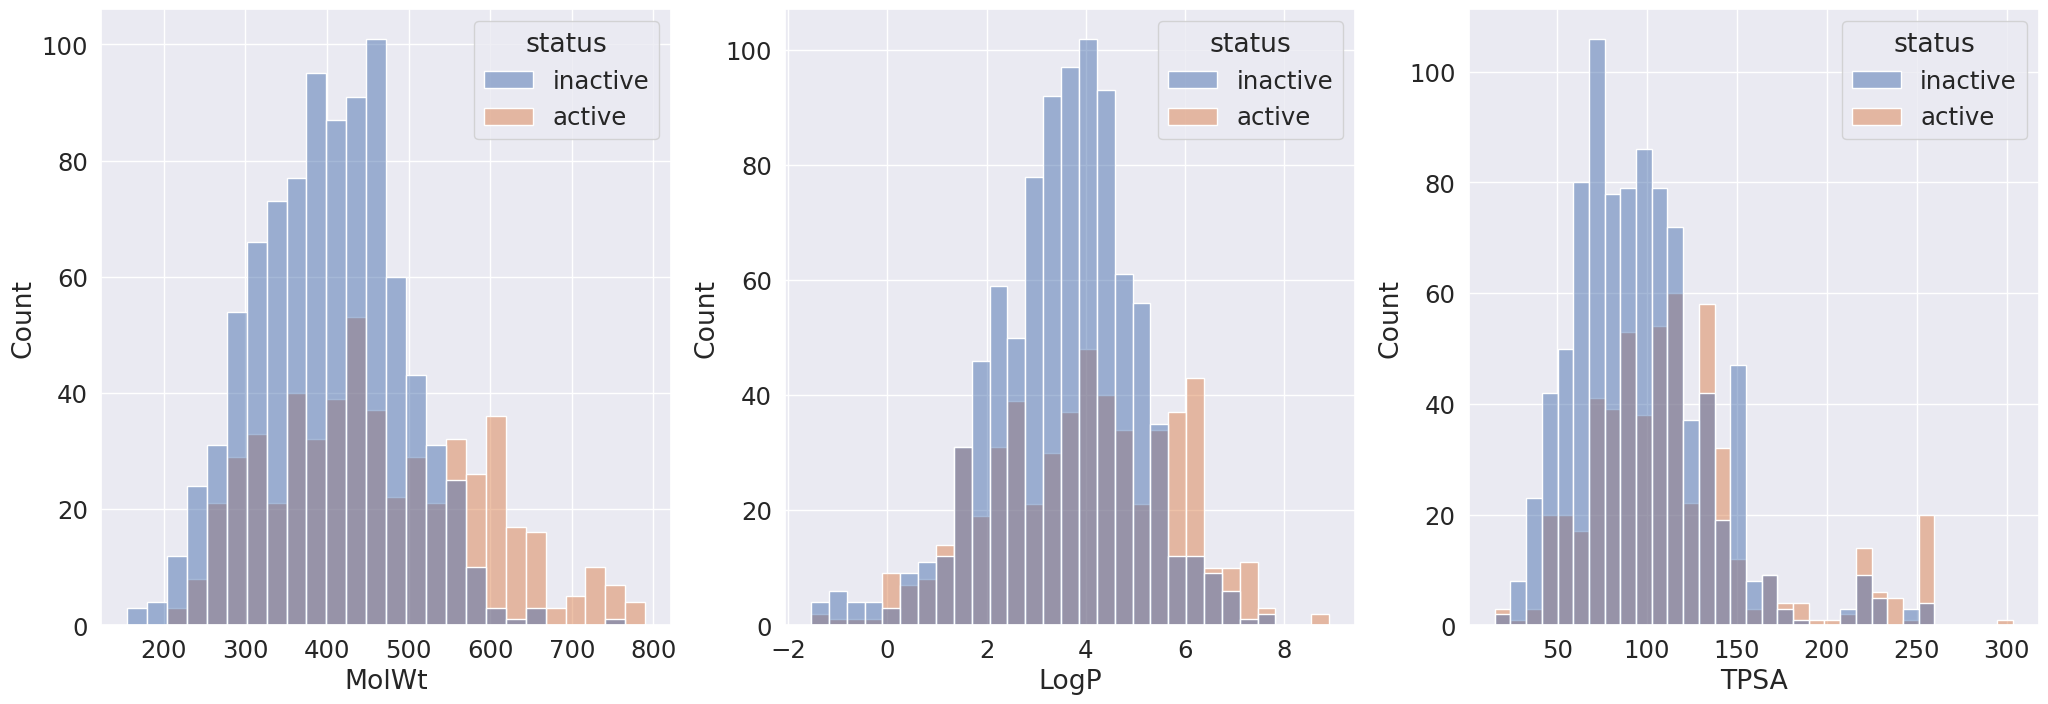

In [109]:
sns.set(font_scale=1.6)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
sns.histplot(data=df4, x="MolWt", hue="status", ax=axes[0])
sns.histplot(data=df4, x="LogP", hue="status", ax=axes[1])
sns.histplot(data=df4, x="TPSA", hue="status", ax=axes[2])
plt.savefig('3.pdf')

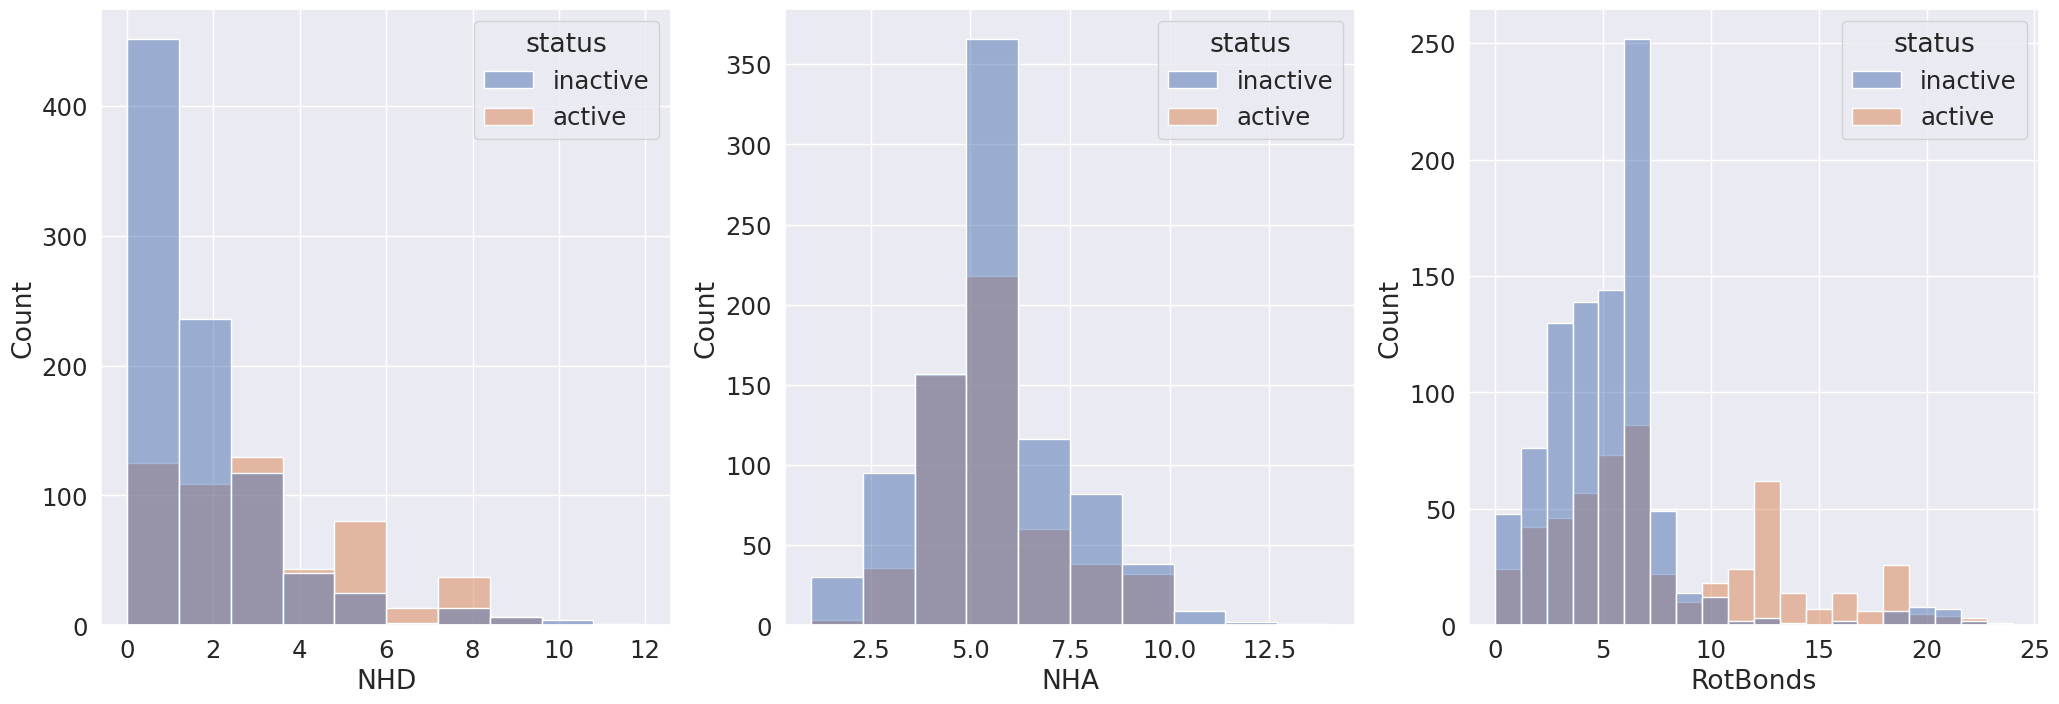

In [110]:
sns.set(font_scale=1.6)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
sns.histplot(data=df4, x="NHD", hue="status", bins=10, ax=axes[0])
sns.histplot(data=df4, x="NHA", hue="status", bins=10, ax=axes[1])
sns.histplot(data=df4, x="RotBonds", hue="status", bins=20, ax=axes[2])
plt.savefig('4.pdf')

# **Calculating Morgan fingerprints**

In [112]:
from rdkit.Chem import AllChem

def Morgan(canonical_smiles):
    fingerprints = []
    for smiles in canonical_smiles:
        ml = Chem.MolFromSmiles(smiles)
        Fp = AllChem.GetMorganFingerprintAsBitVect(ml, 2, 1024)
        arr = np.array(Fp)
        fingerprints.append(arr)

    Morgan_array = np.array(fingerprints)

    return Morgan_array

In [113]:
Fingerprints = Morgan(drug_like["canonical_smiles"])
Fingerprints.shape

(1592, 1024)

In [114]:
df_Fp = pd.DataFrame(Fingerprints, columns=["Bit{}".format(i) for i in range(Fingerprints.shape[1])])
df_Fp

,Bit0,Bit1,Bit2,Bit3,Bit4,Bit5,Bit6,Bit7,Bit8,Bit9,...,Bit1014,Bit1015,Bit1016,Bit1017,Bit1018,Bit1019,Bit1020,Bit1021,Bit1022,Bit1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df5 = pd.concat([drug_like[["molecule_chembl_id", "canonical_smiles", "status"]], df_Fp], axis=1)
df5.reset_index(drop=True, inplace=True)
df5

,molecule_chembl_id,canonical_smiles,status,Bit0,Bit1,Bit2,Bit3,Bit4,Bit5,Bit6,...,Bit1014,Bit1015,Bit1016,Bit1017,Bit1018,Bit1019,Bit1020,Bit1021,Bit1022,Bit1023
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,active,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,CHEMBL5201148,COc1cccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)c1,active,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1588,CHEMBL5195025,N#Cc1ccc(COc2cccc(C(=O)Nc3ccc4c(c3)B(O)OC4)c2)cc1,active,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1589,CHEMBL5169561,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2ccc(Cl)cc2)c1,active,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1590,CHEMBL5185746,O=C(Nc1ccc2c(c1)B(O)OC2)c1cccc(OCc2c(Cl)cccc2C...,active,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df5.to_csv("2-1024_drug_like_MorganFp__status.csv", index=False)

In [117]:
! zip -r 'Collection_processing_Morgan_DENV_NS3.zip' . -i *.csv *.pdf

  adding: 4.pdf (deflated 26%)
  adding: descriptors_with_intermediate_1592.csv (deflated 77%)
  adding: 3.pdf (deflated 25%)
  adding: 2-1024_drug_like_MorganFp__status.csv (deflated 96%)
  adding: 2.pdf (deflated 25%)
  adding: final_3_statuses.csv (deflated 80%)
  adding: 1.pdf (deflated 23%)
  adding: raw_dataset.csv (deflated 93%)
  adding: Denv_targets.csv (deflated 42%)
